In [350]:
%load_ext autoreload
%autoreload 2

from stanley_appex.estimation import *
from stanley_appex.plotting import *
from stanley_appex.utils import *
from stanley_appex.generate_data import *
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


15000
N_traj 25


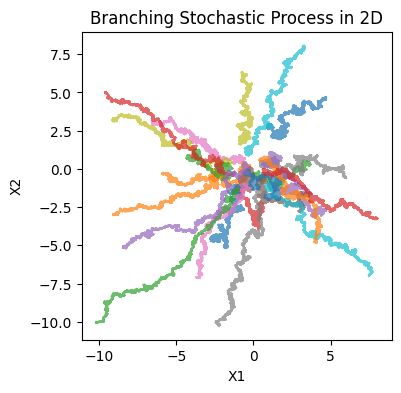

Data saved to data/trajectories.h5


In [ ]:
d = 2
A = np.array([[1, 0.1], 
              [-0.1, 1]])

# A = np.array([1.0])

G = np.array([[1, 0.0], 
              [0.0, 1]])

G = np.eye(d)
# G = np.array([1.0])

H = G@G.T

lambda_func = lambda X: 1.3 * np.exp(-0.01*np.linalg.norm(X))  # Decaying branching rate
lambda_func = lambda X: 0.0 # 1.0 # 1.0 # Constant branching rate

N_init = 25
X0 = np.random.multivariate_normal(np.zeros(d), np.diag(np.ones(d)), N_init) # np.random.normal(0, 1, (N_init, A.shape[1]))
# X0 = np.random.normal(0, 1, (N_init))
Nt = 15000
process = BranchingStochasticProcess(A, G, dt=0.0001, Nt=Nt, N_traj=10)
# process = BranchingStochasticProcess(A, G, X0, no_branch_lambda_func, dt=0.0001, T=2.0, N_traj=10)
process.simulate(X0, lambda_func=lambda_func)
print("N_traj", process.N_traj)
# print(process.lineage_tree)
process.plot_trajectories(downsample=1)

process.save_file('data/trajectories.h5', downsample_rate=500)

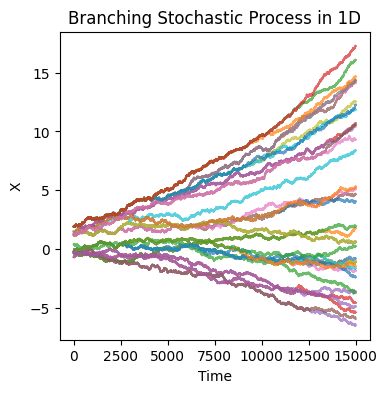

In [250]:
process.plot_trajectories(downsample=1, dim=1)

In [252]:
# xs_data: (N, N_traj, d)
# ts_data: (N,)
downsample_rate = 100

ts_data = process.ts[::downsample_rate]
xs_data = process.marginals(downsample_rate=downsample_rate)

# xs_data = marginals(apply_permutation(process.trajectories[:, :-1:downsample_rate, :]))

print("N traj", process.N_traj, "N time steps", ts_data.shape[0])

ridge_lambda = 0.0

A_guess = A # np.eye(2) # A
H_guess = G@G.T # np.eye(2) # G@G.T
As, Hs, Pis = appex_rectangle(xs_data, ts_data, A_guess, H_guess, N_sample=process.N_traj*10, ridge_lambda=ridge_lambda, tol=1e-5, maxiters=10, print_out=1, save_coupling=True)
A_est = As[-1]
H_est = Hs[-1]
Pi_est = Pis[-1]
print("A_est:\n", A_est)
print("H_est:\n", H_est)
branch_times_data = np.array(process.branch_times) // downsample_rate
branch_times_data

N traj 37 N time steps 150
iteration 0, running tolerance 1.4212670403551897
iteration 1, running tolerance 0.17073644223546613
iteration 2, running tolerance 0.020747661202858828
iteration 3, running tolerance 0.0185397798783374
iteration 4, running tolerance 0.023986367877941058
iteration 5, running tolerance 0.019907805094815982
iteration 6, running tolerance 0.03366732563346483
iteration 7, running tolerance 0.03494199299545233
iteration 8, running tolerance 0.009170420742982027
iteration 9, running tolerance 0.02689160627982318
A_est:
 [[0.92189769 0.11866759]
 [0.03830194 0.95309915]]
H_est:
 [[ 1.01831349 -0.03367356]
 [-0.03367356  1.02712333]]


array([  1,  12,  23,  24,  40,  49,  58,  64,  83,  91,  91,  93, 104,
       107, 108, 111, 114, 114, 115, 124, 132, 133, 133, 136, 138, 142,
       144])

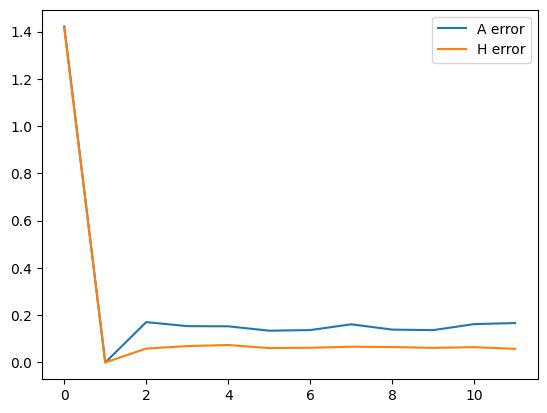

In [253]:
plt.plot(matrix_errors(process, As, Hs)[0], label="A error")
plt.plot(matrix_errors(process, As, Hs)[1], label="H error")
plt.legend()

In [317]:
process.N_traj

37

16 17


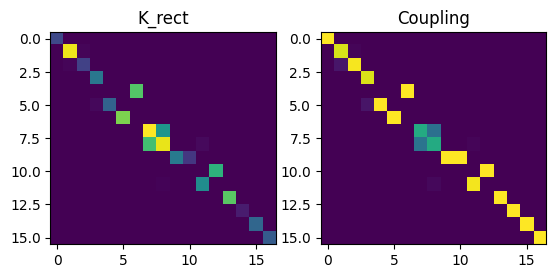

In [316]:
idx=branch_times_data[6]
# idx = 10
plot_kernel_coupling(idx, xs_data, ts_data, A_est, H_est)


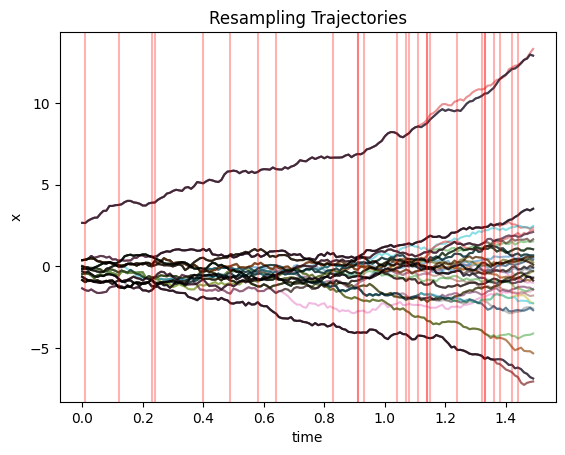

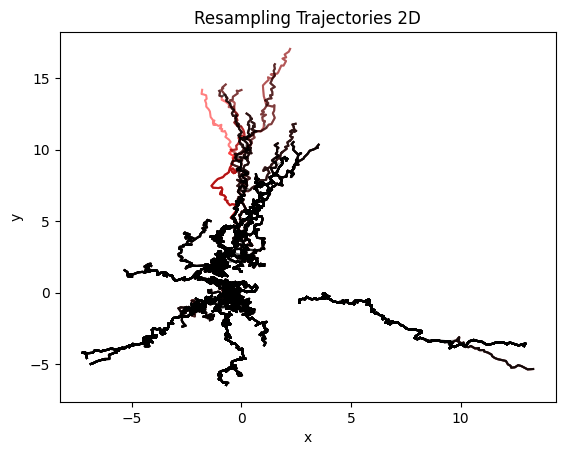

In [320]:
plot_sampling(xs_data, ts_data, Pi_est, process.downsample(downsample_rate), branch_times_data, N_sample=40, plot_dim=1)
plot_sampling(xs_data, ts_data, Pi_est, process.downsample(downsample_rate), branch_times_data, N_sample=500, plot_dim=2)